# Homework Computer vision 

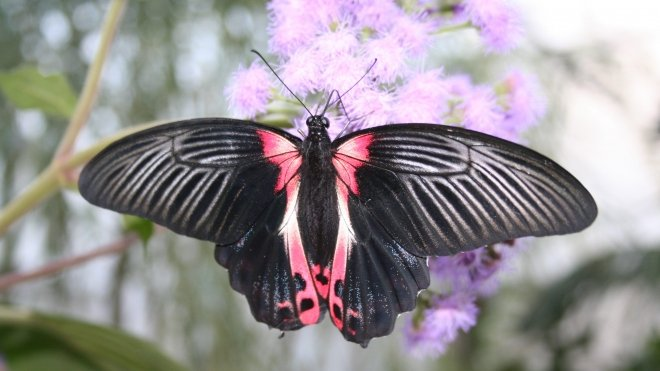

## Opdracht

In deze opgave is het de bedoeling dat je met behulp van een neuraal netwerk __afbeeldingen van vlinders classificeert__. Je doet dit aan de hand van een door ons aangeleverde dataset.
Deze notebook is reeds voorzien van enkele hoofdstukken. Het is dan ook de bedoeling dat je je zelf code en tekst schrijft onder het desbetreffende onderdeel.

Geef ook een __duidelijke argumentatie voor je gemaakte keuzes__. We streven naar een robuust model dat goed presteert, maar je argumentatie is minstens even belangrijk (zodat het duidelijk is dat je de materie onder de knie hebt).

Je rapportering gebeurt in de notebook zelf. *Let erop dat wanneer je tekst wil ingeven, je notebook cell hiervoor op Markdown ingesteld staat.* Je bent trouwens niet beperkt tot de technieken die we in de theorie/labo gezien hebben, maar zorg er steeds voor dat je je keuze kan becommentarieren en/of kan staven door het resultaat van enkele experimentjes.

__Tip:__ De standaard documentatie van de TensorFlow API kan een grote meerwaarde zijn. Wanneer je de cursor plaatst binnen de ronde haakjes van een Python functie en vervolgens SHIFT + TAB indrukt, verschijnt de documentatie van deze functie automatisch.

De **verbetersleutel** ziet er als volgt uit:


|  Onderdeel    | # punten | 
|-----------|:--------:|
|  Data inlezen en voorbereiden | /2 |
|  Model definitie| /6 | 
|  &emsp;- definitie lagen, neuronen en activatiefuncties |
|  &emsp;- keuze loss functie en  evaluatiemetric|
|  &emsp;- keuze optimizer (vergelijk min 2 optimizers) |
|  Regularisatie | /6 |  
|  &emsp; (test en bespreek hier min 3 technieken) | |  
|  Rapportering (gemaakte keuzes + evaluatie model)|     /6   |  
|  &emsp; (de rapportering hoeft geen aaneengesloten tekst te zijn en mag je gerust voorzien tussen je code-cellen) | |
|      Totaal: |     /20    | 

### Praktische afspraken:
Dit project wordt ingediend door deze notebook verder thuis af te werken en te uploaden op Toledo voor de start van je labo in **de week van maandag 10 janauri 2022.** Hiervoor maak je een .ZIP bestand van je notebook en eventueel extra data die je nodig hebt om jouw notebook uit te voeren. Op het einde van deze notebook wordt gevraagd __om je model op te slaan__, zodat we je model eenvoudig kunnen uitvoeren en uiteindelijk een scorebord kunnen maken van alle inzendingen. De vlinders dataset zelf hoef je niet mee te sturen. 

#### Alvast veel succes!

## Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


## Dataset

We werken op een dataset van vlinders. De dataset bestaat uit __464 examples__. Het is niet de bedoeling dat je de dataset zelf nog aanrijkt, maar je mag bijvoorbeeld wel gebruik maken van *Transfer Learning*.

In [ ]:
data_dir = 'dataset'

## Data inlezen en voorbereiden

In [26]:
dataset = tf.keras.utils.image_dataset_from_directory("dataset", validation_split=0.2, subset='training', seed=1)

Found 464 files belonging to 5 classes.
Using 372 files for training.


### Data visualisatie

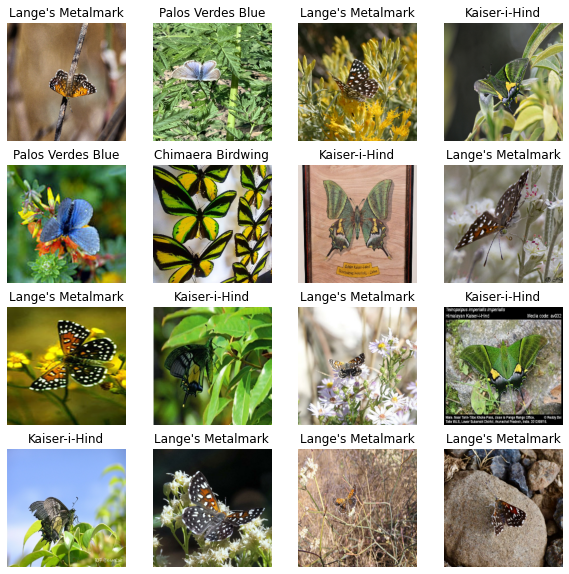

In [27]:
# Print enkele afbeeldingen zodat we een idee hebben hoe de dataset eruit ziet.
class_names = dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

['Bhutan Glory',
 'Chimaera Birdwing',
 'Kaiser-i-Hind',
 "Lange's Metalmark",
 'Palos Verdes Blue']

## Model definitie

In deze sectie stel je het neural netwerk samen en wordt het getraind op de trainingsdata. Gebruik <code>model</code> als variabelenaam voor je model.

In [28]:
# Vul dit zelf aan
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [29]:
# Compileer je model dmv de model.compile() functie
optimizer = 'RMSprop'
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = ['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metric)

## Training

In [32]:
# Train je model dmv de model.fit() functie
NUM_EPOCHS = 5
BATCH_SIZE = 64
history = model.fit(dataset, epochs=NUM_EPOCHS,  batch_size=BATCH_SIZE)

Epoch 1/5
12/12 [==============================] - 3s 221ms/step - loss: 4466.9131 - accuracy: 0.5134
Epoch 2/5
12/12 [==============================] - 3s 220ms/step - loss: 3746.1472 - accuracy: 0.5188
Epoch 3/5
12/12 [==============================] - 3s 224ms/step - loss: 3774.1528 - accuracy: 0.5833
Epoch 4/5
12/12 [==============================] - 3s 218ms/step - loss: 4223.8418 - accuracy: 0.5672
Epoch 5/5
12/12 [==============================] - 3s 217ms/step - loss: 4180.9102 - accuracy: 0.6102


## Model evaluatie

In [ ]:
# Evalueer je mode dmv de model.evaluate() functie

## Model opslaan

Maak gebruik van volgend commando om je model op te slaan. Voeg dit tenslotte toe aan jouw inzending zodat wij je model kunnen evalueren met een test dataset.

In [ ]:
model.save('saved_models/model', include_optimizer=True, save_format='tf')